### Desafío - Pruebas de hipótesis
- Karen Cortes
- Constanza Córdova
- Gustavo Lizama

## 1. Evaluar juicios de hipótesis
A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es posible rechazar la hipótesis nula.

### Encuesta adopción homoparental
#### Hipótesis nula: Ambos de adopción homoparental porcentajes no son diferentes

#### ($H_{o}: {p}_{\textsf{1}} = {p}_{\textsf{2}}$).

#### Hipótesis alternativa: Existe una diferencia substancial entre ambos 

#### ($H_{a}: {p}_{\textsf{1}} \neq {p}_{\textsf{2}}$).

#### donde: 
    - estadistico de contraste: 11.83
    - puntaje de corte: 2.58
    
#### dado que estadístico de contraste >> puntaje de corte, es posible rechazar la hipótesis nula

### Niveles de consumo de alcohol

#### Con la información entregada no se puede discernir si es posible rechazar la hipótesis nula. Se corre el riesgo de que la muestra esté sesgada ya que el tamaño de la muestra es reducido y no se distingue entre cantidad de hombres y mujeres que componen la muestra

## 2.  Importe la base de datos utilizada la sesión presencial anterior
- Agrege una serie de variables binarias por cada continente de la variable region .
    - tip: Utilice np.where para ello.
- De manera similar a la sesión anterior, enfóquese en las siguientes variables:
    - Apellidos desde la A hasta la N: Enfocarse en las variables chldmort , adfert y life .
    - Apellidos desde la N hasta la Z: Enfocarse en las variables femlab , literacy y school .


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [4]:
df = pd.read_csv('nations.csv', encoding='gbk')
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
for i in list(df['region'].unique()):
    df[i] = np.where(df['region'] == i , 1, 0)
    
df

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,Africa,Americas,Asia,Europe,Oceania
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN,1,0,0,0,0
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN,1,0,0,0,0
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN,1,0,0,0,0
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN,1,0,0,0,0
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN,0,0,0,0,1
190,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN,0,0,0,0,1
191,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN,0,0,0,0,1
192,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN,0,0,0,0,1


## 3.  Implemente una función de prueba de hipótesis a mano
- La función debe ingresar los siguientes argumentos:
    - df : La tabla de datos.
    - variable : La variable a analizar.
    - binarize : El indicador binario a utilizar.
- tips:
    - Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con dropna() .
    - Implemente ttest_ind de scipy.stats y guarde el valor t y pval .
    - Reporte las medias para cada grupo (0 y 1).
    - Reporte la diferencia de entre las medias.
    - Reporte los valores t y p


### funcion prueba de hipotesis: 

In [6]:
def prueba_hipotesis(df, variable, binarize):
    sub_df1 = df[df[binarize] == 1][variable].dropna() #observacion que corresponde a la región seleccionada
    sub_df2 = df[df[binarize] == 0][variable].dropna() #observaciones del resto de regiones
    
    t, pval = stats.ttest_ind(sub_df1, sub_df2)
    
    media_df1 = round(np.mean(sub_df1),2)
    media_df2 = round(np.mean(sub_df2),2)
    diff_mean = round(media_df1 - media_df2,2)
    
    print('variable: ', variable, '|| continente:', binarize)
    print(f'media de {binarize}: ', media_df1)
    print(f'media otros continentes: ', media_df2)
    print('diferencia medias: ', diff_mean)
    print('t: ', t, '   ','p: ',pval)
    print('**********\n')

### Funcion evaluada para variable: chldmort por región

In [7]:
for i in list(df['region'].unique()):
    prueba_hipotesis(df, 'chldmort', i)

variable:  chldmort || continente: Africa
media de Africa:  109.75
media otros continentes:  24.75
diferencia medias:  85.0
t:  14.17367667788517     p:  1.244572684496239e-31
**********

variable:  chldmort || continente: Americas
media de Americas:  23.26
media otros continentes:  53.05
diferencia medias:  -29.79
t:  -3.08561941878294     p:  0.00233300081092071
**********

variable:  chldmort || continente: Asia
media de Asia:  37.1
media otros continentes:  51.14
diferencia medias:  -14.04
t:  -1.602738386676471     p:  0.1106448646711535
**********

variable:  chldmort || continente: Europe
media de Europe:  7.05
media otros continentes:  59.29
diferencia medias:  -52.24
t:  -6.262400472976766     p:  2.4506589890929246e-09
**********

variable:  chldmort || continente: Oceania
media de Oceania:  39.42
media otros continentes:  48.34
diferencia medias:  -8.92
t:  -0.6277779742677246     p:  0.5308992371716935
**********



### Funcion evaluada para variable: adfert por región

In [8]:
for i in list(df['region'].unique()):
    prueba_hipotesis(df, 'adfert', i)

variable:  adfert || continente: Africa
media de Africa:  92.72
media otros continentes:  36.83
diferencia medias:  55.89
t:  9.444409431356496     p:  1.2481674170069097e-17
**********

variable:  adfert || continente: Americas
media de Americas:  63.66
media otros continentes:  49.21
diferencia medias:  14.45
t:  1.7662790555775358     p:  0.07893816171889229
**********

variable:  adfert || continente: Asia
media de Asia:  33.87
media otros continentes:  57.88
diferencia medias:  -24.01
t:  -3.386269877966909     p:  0.0008592686089688165
**********

variable:  adfert || continente: Europe
media de Europe:  15.54
media otros continentes:  62.15
diferencia medias:  -46.61
t:  -6.797972597840039     p:  1.3040875269879142e-10
**********

variable:  adfert || continente: Oceania
media de Oceania:  44.99
media otros continentes:  52.39
diferencia medias:  -7.4
t:  -0.6231321887004015     p:  0.5339371393742243
**********



### Funcion evaluada para variable: life por región

In [9]:
for i in list(df['region'].unique()):
    prueba_hipotesis(df, 'life', i)

variable:  life || continente: Africa
media de Africa:  56.49
media otros continentes:  73.21
diferencia medias:  -16.72
t:  -15.174602759471485     p:  1.0713988391633837e-34
**********

variable:  life || continente: Americas
media de Americas:  73.45
media otros continentes:  67.69
diferencia medias:  5.76
t:  3.138414667252044     p:  0.0019666060685098454
**********

variable:  life || continente: Asia
media de Asia:  70.87
media otros continentes:  68.01
diferencia medias:  2.86
t:  1.7346722179790488     p:  0.08440370105334277
**********

variable:  life || continente: Europe
media de Europe:  76.95
media otros continentes:  66.39
diferencia medias:  10.56
t:  6.735355531733241     p:  1.8491610377704372e-10
**********

variable:  life || continente: Oceania
media de Oceania:  69.58
media otros continentes:  68.66
diferencia medias:  0.92
t:  0.342110739720379     p:  0.7326417413000359
**********



### 4. Implemente una función que grafique los histogramas para ambas muestras.
- Genere una función que devuelva un gráfico donde visualice las dos histogramas cuando la variable es 1 y 0, respectivamente.
    - tips: Refactorize la función incluyendo el método hist de matplotlib.pyplot .
    - Incluya los argumentos alpha y label .
- Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique. Concluya con los principales resultados al respecto.

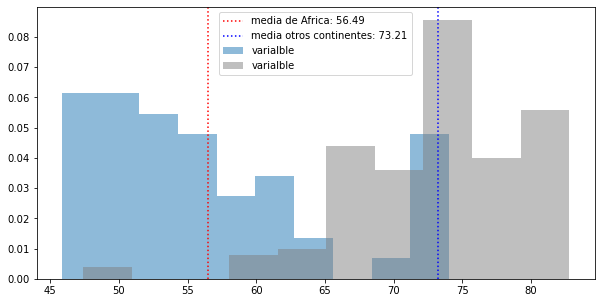

In [21]:
def grafique_histogram(dataframe, variable, binarize, alpha, label = 'varialble'):
    plt.rcParams['figure.figsize'] = (10,5)

    sub_df1 = df[df[binarize] == 1][variable].dropna() #observacion que corresponde a la región seleccionada
    media1 =  round(np.mean(sub_df1),2)
    sub_df2 = df[df[binarize] == 0][variable].dropna() #observaciones del resto de regiones
    media2 =  round(np.mean(sub_df2),2)
    

    plt.hist(sub_df1, bins = 10, alpha = alpha, label = label, density = True)
    plt.axvline(media1, color='r', ls="dotted", label = f'media de {binarize}: '+str(media1))
    plt.hist(sub_df2, bins = 10, color = 'grey', alpha = alpha, label = label, density = True)
    plt.axvline(media2, color='blue', ls="dotted", label = 'media otros continentes: '+str(media2))
    
    plt.legend()
    
grafique_histogram(df, 'life', 'Africa', 0.5)

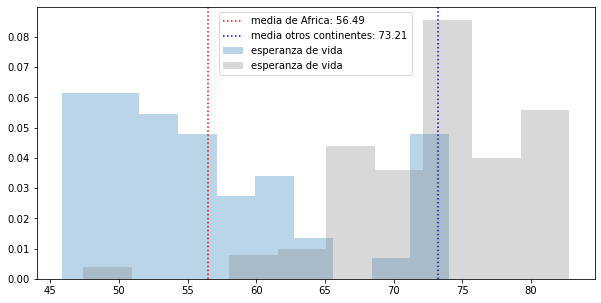

In [22]:
grafique_histogram(df, 'life', 'Africa', 0.3, 'esperanza de vida')